### 의사결정나무와 랜덤포레스트

In [1]:
# 필요한 패키지 설치
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/uciml/glass
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/glass.csv")

# 데이터 샘플 확인
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# 컬럼 정보 확인

df.info()

#속성과 결측값을 확인해보자. 결측값은 없고 모든 칼럼이 숫자형으로 이루어져 있다.
#종속변수로 쓰이는 Type칼럼을 문자형 변수로 변환해줘야 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# 종속변수 문자형 변환

df["Type_str"]=df["Type"].apply(str)
df.head()

#기존 Type 칼럼에 apply(str) 함수를 적용하여 문자형으로 변환된 Type_str 칼럼을 새로 생성했다. 모델에서는 기존 Type 칼럼은 사용되지 않는다.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_str
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [5]:
# 의사결정나무 모델 용 데이터셋 가공

# 독립변수, 종속변수 분리
df_x = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
df_y = df[['Type_str']]

# 학습셋과 테스트셋 분리하여 생성(6:4)
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

#데이터셋을 의사결정나무 모델에 적용하기 위해 독립변수와 종속변수를 분리하고 학습셋과 테스트셋으로 나눠준다.
#기존 데이터의 관측치 수가 214개로 적은편이기 때문에 6:4의 비율로 설정해준다.
#아웃풋 결과로 학습셋 128개 테스트셋 86개로 배분된 것을 확인할 수 있다.

train data 개수:  128
test data 개수:  86


In [6]:
# 의사결정나무 모델 적용

# 모델 생성 및 학습
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
dt_model.fit(x_train,y_train)

# 테스트셋 예측
y_pred = dt_model.predict(x_test)

# 정확도 계산
accuracy_score(y_test, y_pred)

#이제 의사결정나무 모델로 유리타입 분류 모델을 학습시킨다. 옵션으로 엔트로피로 분류를 하도록 설정했다.
#노드의 층이 최대 5개까지만 생성되도록 했고 이는, 과적합 방지하기 위한 방법으로 최대 층이 너무 많으면 모델이 너무 복잡해서 과적합이 생길 수 있다.
#아웃풋 결과에서 분류 정확도가 약 61.6%인 것을 알 수 있다. 종속변수의 카테고리가 총 7개인 것을 고려하면 나쁘지 않은 성능인 것으로 보인다.

0.6162790697674418

In [7]:
# 독립변수 중요도 확인

dt_model.feature_importances_

pd.DataFrame({'feature' : x_train.columns,

              'importance' : dt_model.feature_importances_})

#각 독립변수가 종속변수의 분류 예측에 얼마나 중요한지를 수치로 표현한다,.
#합계는 1이 되며 값이 클수록 분류가 강한 영향을 미치는 것으로 판단한다.
#아웃풋 결과에서는 마그네슘,알루미늄 등의 변수가 중요한 것으로 나타났다.

,feature,importance
0,RI,0.107206
1,Na,0.100296
2,Mg,0.320142
3,Al,0.159473
4,Si,0.100123
5,K,0.053088
6,Ca,0.133502
7,Ba,0.026172
8,Fe,0.000000


In [8]:
# 랜덤포레스트 모델 생성

# 기본 모델
# rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)

rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,
                                   bootstrap=True, class_weight=None, criterion='gini',
                                   max_features='auto', max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_samples_leaf=1, 
                                   min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                   n_jobs=None, oob_score=False,  verbose=0,
                                   warm_start=False)

rnf_model.fit(x_train,y_train)

y_pred = rnf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

#의사결정나무 모델을 앙상블한 랜덤포레스트 모델을 적용한다. 기본적인 모델은 주석 처리한 4번째 줄의 코드만으로도 생성이 가능하다.
#세부적인 하이퍼 파라미터 튜닝을 위해서는 예시와 같은 다양한 옵션을 사용할 수 있다.
#이번 실습에서는 지니계수로 학습을 시켰고 나머지는 거의 기본값으로 설정했다.
#아웃풋 결과로 기존 의사결정나무보다 우수한 70.9%의 정확도가 나왔다.

0.7093023255813954


C:\Users\qorud\AppData\Local\Temp\ipykernel_21880\1133970349.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnf_model.fit(x_train,y_train)


In [9]:
# 랜덤포레스트 모델 성능 리포트 출력

print(classification_report(y_test, y_pred))

#다음 수치해석은 추후에 모델 평가 부분에서 다룬다.

              precision    recall  f1-score   support

           1       0.69      0.73      0.71        30
           2       0.62      0.77      0.69        26
           3       0.67      0.29      0.40         7
           5       1.00      0.75      0.86         8
           6       0.50      0.25      0.33         4
           7       0.91      0.91      0.91        11

    accuracy                           0.71        86
   macro avg       0.73      0.62      0.65        86
weighted avg       0.72      0.71      0.70        86



In [10]:
# 랜덤포레스트 변수 중요도 출력

feature_imp = pd.Series(rnf_model.feature_importances_, 
                        index=x_train.columns).sort_values(ascending=False)
feature_imp[:20]

Al    0.159236
Ca    0.153955
Mg    0.148816
RI    0.140340
Na    0.107937
Ba    0.090783
K     0.079957
Si    0.072258
Fe    0.046717
dtype: float64

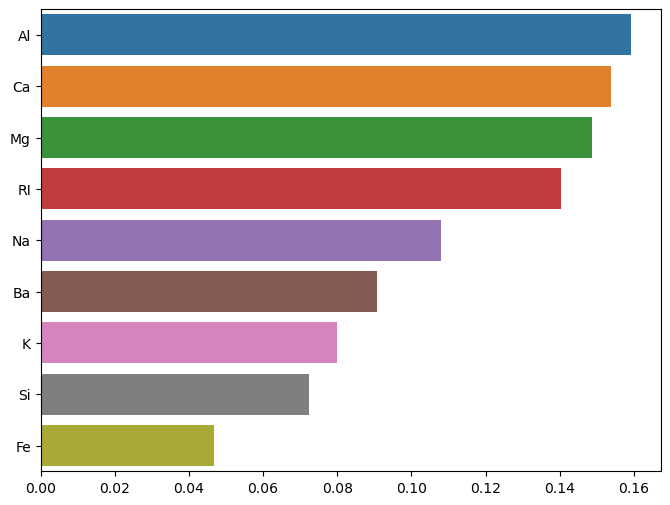

In [11]:
# 랜덤포레스트 변수 중요도 시각화

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

#다음과 같이 직관적으로 볼 수 있게 막대그래프 형태로 시각화한다.